[View in Colaboratory](https://colab.research.google.com/github/lvwuyunlifan/Colaboratory/blob/master/chapter3.ipynb)

#环境
**首先到修改--->笔记本设置--->选择Python3 和GPU**

上传代码所需要的图片box.png、box_in_scene.png、butterfly.jpg、chessboard.png、home.jpg以及文件等

In [0]:
from google.colab import files
import os 
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [1]:
# 忽略其他的文件，那些文件是我自己放上面玩的。只需要上传以上五个图片就行
! ls 

AlexNet1.py	  caffe_classes.py  home.jpg	      quail227.JPEG
AlexNet.py	  chessboard.png    ImageStiching.py  right_01.png
box_in_scene.png  datalab	    laska.png	      sift_keypoints.jpg
box.png		  dog2.png	    left_01.png       stitcher
butterfly.jpg	  dog.png	    poodle.png	      Stitcher.py
bvlc_alexnet.npy  examples.jpg	    __pycache__


## orb.py

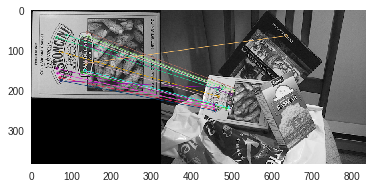

In [2]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


img1 = cv.imread('./box.png',0)          # queryImage
img2 = cv.imread('./box_in_scene.png',0) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:20],None, flags=2)
plt.grid(False) # 关闭网格线
plt.imshow(img3)
plt.show()

##harris_corner.py

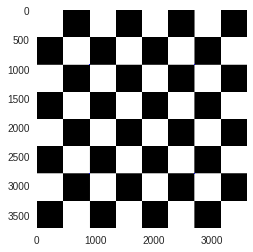

In [3]:
%matplotlib inline

import numpy as np
import cv2 as cv
# 可视化
import matplotlib.pyplot as plt


filename = './chessboard.png'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
plt.grid(False)
plt.imshow(img)

# 具体这个是什么效果我也不知道，电脑的cv包有问题，没法做参考，所以忽略此代码。
# if cv.waitKey(0) & 0xff == 27:
#     cv.destroyAllWindows()

##cv2依赖
如果你运行一下sift.py没有报“”cv 没有xfeatures2d“的错误，下面的代码就不需要运行，否则需要安装cv依赖
**原因：**3.X以后OpenCv只包含部分内容，需要神经网络或者其他的函数需要导入opencv_contrib

In [4]:
# ! pip uninstall opencv-python
# ! pip install opencv-python

! pip3 install opencv-contrib-python

##sift.py

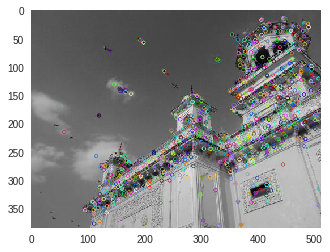

In [4]:
%matplotlib inline

import numpy as np
import cv2 as cv
# 可视化
import matplotlib.pyplot as plt


img = cv.imread('/content/home.jpg', 1)
gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
sift = cv.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img)

plt.grid(False)
plt.imshow(img)
plt.savefig("sift_keypoints.jpg")

# cv.imshow("SIFT", img)
# cv.imwrite('sift_keypoints.jpg',img)
# cv.waitKey(0)
# cv.destroyAllWindows()


##存储到drive
下面会把上面单元生成的图片保存到Google云盘上，执行下面代码时需要账号验证，点开链接，一路验证下去，最后生成的验证码复制到方框内，按回车键Enter，自动保存到Google云盘根目录上。

In [5]:
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload

auth.authenticate_user()
drive_service = build('drive', 'v3')

file_metadata = {
  'name': 'sift_keypoints.jpg',
  'mimeType': 'image/jpeg'
}
# 配置上传文件
media = MediaFileUpload('sift_keypoints.jpg', 
                        mimetype='image/jpeg',
                        resumable=True)
# 在drive创建文件
created = drive_service.files().create(body=file_metadata,
                                       media_body=media,
                                       fields='id').execute()
print('File ID: {}'.format(created.get('id')))

File ID: 1-KRm9YJ6oflvUzmj2Xdv2LBSOa2EWLAY


##surf.py

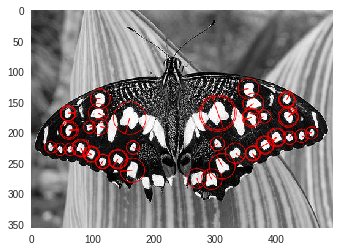

In [6]:
%matplotlib inline

import numpy as np
import cv2 as cv
# 替代cv可视化
import matplotlib.pyplot as plt


img = cv.imread('./butterfly.jpg',0)

surf = cv.xfeatures2d.SURF_create(400)

#kp, des = surf.detectAndCompute(img,None)
surf.setHessianThreshold(50000)

kp, des = surf.detectAndCompute(img,None)

img2 = cv.drawKeypoints(img,kp,None,(255,0,0),4)  # b=蓝色，g=绿色，r=红色
# img_plt2 = img2[::-1]  # 转换为BGR

# plt.subplot(122)
plt.grid(False)
plt.imshow(img2)  # 显示BGR
plt.show() 

# cv.imshow('surf',img2)
# cv.waitKey(0)
# cv.destroyAllWindows()

## 上传stitcher文件下的IStitcher.py和image图片left_01.png、right_01.png

In [0]:
from google.colab import files
import os 
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [8]:
! ls 

AlexNet1.py	  caffe_classes.py  home.jpg	      quail227.JPEG
AlexNet.py	  chessboard.png    ImageStiching.py  right_01.png
box_in_scene.png  datalab	    laska.png	      sift_keypoints.jpg
box.png		  dog2.png	    left_01.png       stitcher
butterfly.jpg	  dog.png	    poodle.png	      Stitcher.py
bvlc_alexnet.npy  examples.jpg	    __pycache__


###ImageStiching.py
图像放到一个figure显示，分为四个区域

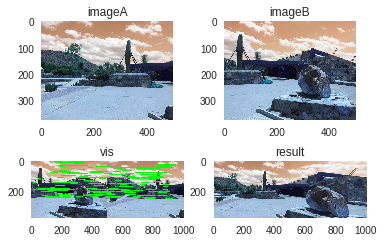

In [10]:
%matplotlib inline

from Stitcher import Stitcher
import cv2
# 替代cv可视化
import matplotlib.pyplot as plt


# 读取拼接图片
imageA = cv2.imread("./left_01.png")
imageB = cv2.imread("./right_01.png")

# 把图片拼接成全景图
stitcher = Stitcher()
(result, vis) = stitcher.stitch([imageA, imageB], showMatches=True)

# 显示所有照片
plt.figure(20)

plt.subplot(221)  # 把一个figure分割成 2x2 四份，221后面的1指的是第一个，即第一行第一列的那个
plt.imshow(imageA)
plt.grid(False)
plt.title('imageA')

plt.subplot(222)  # 一行二列
plt.imshow(imageB)
plt.grid(False)
plt.title('imageB')

plt.subplot(223)  
plt.imshow(vis)
plt.grid(False)
plt.title('vis')

plt.subplot(224)
plt.imshow(result)
plt.grid(False)
plt.title('result')

plt.show()
# 显示所有图片
# cv2.imshow("Image A", imageA)
# cv2.imshow("Image B", imageB)
# cv2.imshow("Keypoint Matches", vis)
# cv2.imshow("Result", result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()




图像分开显示

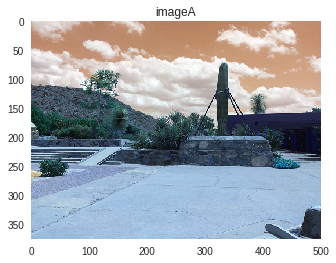

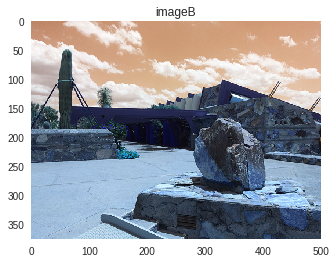

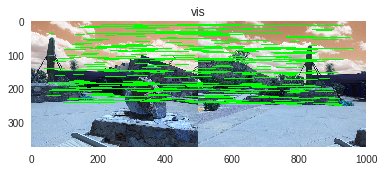

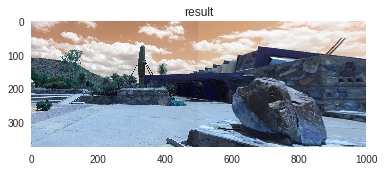

In [11]:
%matplotlib inline

from Stitcher import Stitcher
import cv2
# 替代cv可视化
import matplotlib.pyplot as plt


# 读取拼接图片
imageA = cv2.imread("./left_01.png")
imageB = cv2.imread("./right_01.png")

# 把图片拼接成全景图
stitcher = Stitcher()
(result, vis) = stitcher.stitch([imageA, imageB], showMatches=True)

# 显示所有照片
plt.figure(20)

# plt.subplot(221)
plt.imshow(imageA)
plt.grid(False)
plt.title('imageA')
plt.show()

# plt.subplot(222)
plt.imshow(imageB)
plt.grid(False)
plt.title('imageB')
plt.show()

# plt.subplot(223)
plt.imshow(vis)
plt.grid(False)
plt.title('vis')
plt.show()

# plt.subplot(224)
plt.imshow(result)
plt.grid(False)
plt.title('result')
plt.show()
# 显示所有图片
# cv2.imshow("Image A", imageA)
# cv2.imshow("Image B", imageB)
# cv2.imshow("Keypoint Matches", vis)
# cv2.imshow("Result", result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
